In [28]:
library(MASS)
library(Matrix)
library(reticulate)
library(data.table)

In [29]:
scATAC_ours <- readRDS("data/scATAC.raw.sparse_referenced.rds")
scRNA_ours <- readRDS("data/snRNA.raw.sparse_right_path.rds")

In [30]:
scATAC_theirs <- readRDS("sce_10xPBMC_atac.rds")
scRNA_theirs <- readRDS("sce_10xPBMC_rna.rds")

In [31]:
library(SingleCellExperiment)
library(DropletUtils)
library(scater)
library(ggplot2)

In [32]:
common_genes <- intersect(rownames(scATAC_ours),
                          rownames(scRNA_ours))

In [33]:
norm.cnts_RNA <- log1p((scRNA_ours[common_genes, ]) %*% Diagonal(x=1e4/Matrix::colSums(scRNA_ours[common_genes, ])))
norm.cnts_ATAC <- log1p((scATAC_ours[common_genes, ]) %*% Diagonal(x=1e4/Matrix::colSums(scATAC_ours[common_genes, ])))


In [34]:
mat_theirs <- logcounts(scRNA_theirs)

prop_cells_RNA_theirs <- t(mat_theirs)[Matrix::rowMeans(t(mat_theirs)>0),]


#num_genes <- mat[,Matrix::colSums(mat>0),]
mat_ours <- norm.cnts_RNA
prop_cells_RNA_ours <- mat_ours[Matrix::rowMeans(mat_ours)>0,]


mat_theirs <- logcounts(scATAC_theirs)
prop_cells_ATAC_theirs <- mat_theirs[Matrix::rowMeans(mat_theirs)>0,]
#num_genes <- mat[,Matrix::colSums(mat>0),]
mat_ours <- norm.cnts_ATAC
prop_cells_ATAC_ours <- mat_ours[Matrix::rowMeans(mat_ours)>0,]

In [35]:
prop_cells_RNA_theirs

   [[ suppressing 25638 column names 'AL627309.1', 'AL627309.3', 'AL627309.5' ... ]]



0 x 25638 sparse Matrix of class "dgCMatrix"
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                           

In [36]:
mat_theirs <- prop_cells_RNA_theirs
num_genes_RNA_theirs <- mat_theirs[,Matrix::colSums(mat_theirs)>0,]
mat_ours <- prop_cells_RNA_ours
num_genes_RNA_ours <- mat_ours[,Matrix::colSums(mat_ours)>0,]

mat_theirs <- prop_cells_ATAC_theirs
num_genes_ATAC_theirs <- mat_theirs[,Matrix::colSums(mat_theirs)>0,]
mat_ours <- prop_cells_ATAC_ours
num_genes_ATAC_ours <- mat_ours[,Matrix::colSums(mat_ours)>0,]


In [37]:
colSums(num_genes_RNA_ours)

CB:Z:AAACCCAAGACGAAGA-Xuan_maize_rna2_addseq 
                                      1769.180 
      CB:Z:AAACCCAAGACGTCGA-Zm-leaf-scRNA-rep1 
                                      1815.229 
 CB:Z:AAACCCAAGAGTTGTA-B73Mo17_maize_rna_fresh 
                                      2078.358 
CB:Z:AAACCCAAGCACCGAA-B73Mo17_maize_rna_frozen 
                                      3226.015 
      CB:Z:AAACCCAAGCCTCCAG-Zm-leaf-scRNA-rep1 
                                      1869.803 
  CB:Z:AAACCCAAGCCTGTCG-Xuan_maize_rna2_addseq 
                                      1785.035 
  CB:Z:AAACCCAAGCCTTTGA-Xuan_maize_rna2_addseq 
                                      1840.029 
CB:Z:AAACCCAAGCGACAGT-B73Mo17_maize_rna_frozen 
                                      3884.441 
CB:Z:AAACCCAAGGAAAGTG-B73Mo17_maize_rna_frozen 
                                      1453.798 
 CB:Z:AAACCCAAGGGTAGCT-B73Mo17_maize_rna_fresh 
                                      2235.917 
      CB:Z:AAACCCAAGTAAACGT-Zm-leaf-scRNA-rep1 
                                      1845.604 
 CB:Z:AAACCCAAGTCACGAG-B73Mo17_maize_rna_fresh 
                                      2780.149 
 CB:Z:AAACCCACAACCCGCA-B73Mo17_maize_rna_fresh 
                                      2247.075 
 CB:Z:AAACCCACAACCGCTG-B73Mo17_maize_rna_fresh 
                                      2090.994 
      CB:Z:AAACCCACAATGCAGG-Zm-leaf-scRNA-rep1 
                                      1851.892 
      CB:Z:AAACCCACACCACTGG-Zm-leaf-scRNA-rep1 
                                      2005.823 
 CB:Z:AAACCCACACCTATCC-B73Mo17_maize_rna_fresh 
                                      2138.811 
      CB:Z:AAACCCACACTTGTCC-Zm-leaf-scRNA-rep1 
                                      2706.574 
 CB:Z:AAACCCACAGGTACGA-B73Mo17_maize_rna_fresh 
                                      2450.846 
      CB:Z:AAACCCACAGTTAGGG-Zm-leaf-scRNA-rep1 
                                      1833.177 
  CB:Z:AAACCCACATGTTCGA-Xuan_maize_rna2_addseq 
                                      1780.995 
  CB:Z:AAACCCACATTGCTTT-Xuan_maize_rna2_addseq 
                                      1691.151 
  CB:Z:AAACCCAGTACAGTTC-Xuan_maize_rna2_addseq 
                                      1305.436 
 CB:Z:AAACCCAGTAGTGCGA-B73Mo17_maize_rna_fresh 
                                      2147.990 
CB:Z:AAACCCAGTCAGTCCG-B73Mo17_maize_rna_frozen 
                                      2528.051 
CB:Z:AAACCCAGTCGTGCCA-B73Mo17_maize_rna_frozen 
                                      4071.781 
  CB:Z:AAACCCAGTGAGGAAA-Xuan_maize_rna2_addseq 
                                      2313.364 
CB:Z:AAACCCAGTGATACTC-B73Mo17_maize_rna_frozen 
                                      2407.059 
  CB:Z:AAACCCAGTGCCAAGA-Xuan_maize_rna2_addseq 
                                      1728.337 
CB:Z:AAACCCAGTTCAAACC-B73Mo17_maize_rna_frozen 
                                      2865.706 
CB:Z:AAACCCAGTTCGAGCC-B73Mo17_maize_rna_frozen 
                                      2893.490 
  CB:Z:AAACCCATCACACCGG-Xuan_maize_rna2_addseq 
                                      2281.136 
CB:Z:AAACCCATCACGATAC-B73Mo17_maize_rna_frozen 
                                      5033.667 
  CB:Z:AAACCCATCAGCAGAG-Xuan_maize_rna2_addseq 
                                      1834.548 
CB:Z:AAACCCATCCCACAGG-B73Mo17_maize_rna_frozen 
                                      2766.968 
      CB:Z:AAACCCATCCGTAATG-Zm-leaf-scRNA-rep1 
                                      2858.429 
  CB:Z:AAACCCATCGAGTCCG-Xuan_maize_rna2_addseq 
                                      3358.102 
 CB:Z:AAACCCATCGCGGACT-B73Mo17_maize_rna_fresh 
                                      2167.279 
      CB:Z:AAACCCATCGCTCTAC-Zm-leaf-scRNA-rep1 
                                      2329.279 
  CB:Z:AAACCCATCTCCAATT-Xuan_maize_rna2_addseq 
                                      2134.252 
      CB:Z:AAACCCATCTGCATAG-Zm-leaf-scRNA-rep1 
                                      2573.864 
CB:Z:AAACCCATCTGCGAGC-B73Mo17_maize_rna_frozen 
                  

In [38]:
rowSums(num_genes_RNA_ours)

Zm00001eb000010 Zm00001eb000020 Zm00001eb000050 Zm00001eb000060 Zm00001eb000070 
   3.129887e+03    3.213461e+03    8.889748e+02    9.319092e+02    1.120236e+02 
Zm00001eb000080 Zm00001eb000100 Zm00001eb000120 Zm00001eb000140 Zm00001eb000150 
   8.265794e+03    3.614605e+00    2.132553e+01    1.676844e+02    5.278217e+00 
Zm00001eb000170 Zm00001eb000190 Zm00001eb000200 Zm00001eb000210 Zm00001eb000220 
   2.435046e+04    1.710563e+04    1.023270e+02    6.704112e+03    8.092951e+02 
Zm00001eb000230 Zm00001eb000240 Zm00001eb000250 Zm00001eb000270 Zm00001eb000290 
   4.045175e+01    1.846535e+03    1.642228e+00    7.239045e+02    1.028553e+01 
Zm00001eb000300 Zm00001eb000310 Zm00001eb000320 Zm00001eb000330 Zm00001eb000340 
   4.123880e+02    8.768234e+03    9.053095e+03    1.627723e+03    1.946484e+04 
Zm00001eb000370 Zm00001eb000380 Zm00001eb000390 Zm00001eb000400 Zm00001eb000410 
   7.645634e+01    4.342075e+02    2.078567e+00    4.253603e+02    2.677803e+01 
Zm00001eb000420 Zm00001eb000430 Zm00001eb000440 Zm00001eb000450 Zm00001eb000460 
   1.944387e+04    4.244766e+00    2.174759e+03    2.199396e+04    9.848410e+01 
Zm00001eb000470 Zm00001eb000480 Zm00001eb000490 Zm00001eb000500 Zm00001eb000510 
   1.806426e+02    1.286384e+04    4.784757e+03    1.357421e+03    1.035121e+03 
Zm00001eb000520 Zm00001eb000540 Zm00001eb000550 Zm00001eb000560 Zm00001eb000570 
   9.275460e+03    9.713410e+02    4.672576e+03    5.981016e+00    6.370104e+02 
Zm00001eb000590 Zm00001eb000600 Zm00001eb000620 Zm00001eb000630 Zm00001eb000640 
   6.086942e+03    9.404047e+02    4.167860e+03    2.965629e+00    4.262886e+02 
Zm00001eb000650 Zm00001eb000660 Zm00001eb000670 Zm00001eb000680 Zm00001eb000690 
   1.408288e+03    9.947003e+02    4.653338e+03    6.673747e+01    4.176797e+03 
Zm00001eb000700 Zm00001eb000710 Zm00001eb000720 Zm00001eb000740 Zm00001eb000750 
   4.993777e+03    1.844859e+03    2.301042e+03    5.003640e+03    1.345038e+03 
Zm00001eb000760 Zm00001eb000770 Zm00001eb000780 Zm00001eb000790 Zm00001eb000800 
   3.971135e+02    5.418203e+03    4.023917e+03    8.302359e+02    4.470143e+03 
Zm00001eb000810 Zm00001eb000820 Zm00001eb000830 Zm00001eb000840 Zm00001eb000850 
   6.561449e+00    1.654559e+03    1.781893e+01    9.800208e+02    2.640100e+03 
Zm00001eb000860 Zm00001eb000870 Zm00001eb000880 Zm00001eb000890 Zm00001eb000900 
   7.444694e+03    8.405318e+03    5.624739e+03    4.425360e+03    2.466661e+02 
Zm00001eb000910 Zm00001eb000920 Zm00001eb000930 Zm00001eb000960 Zm00001eb000970 
   6.087646e+02    5.477308e+03    1.264172e+02    1.271408e+02    4.450157e+03 
Zm00001eb000980 Zm00001eb000990 Zm00001eb001000 Zm00001eb001010 Zm00001eb001020 
   3.122015e+02    1.693818e+03    5.227244e+03    1.138945e+03    7.400345e+02 
Zm00001eb001030 Zm00001eb001040 Zm00001eb001050 Zm00001eb001060 Zm00001eb001070 
   1.533893e+01    1.242866e+03    6.927659e+02    1.292761e+02    1.246478e+03 
Zm00001eb001090 Zm00001eb001100 Zm00001eb001110 Zm00001eb001120 Zm00001eb001130 
   6.238406e+01    1.528487e+00    1.581771e+03    4.845920e+02    1.063336e+03 
Zm00001eb001140 Zm00001eb001150 Zm00001eb001160 Zm00001eb001170 Zm00001eb001180 
   3.090368e+03    1.081332e+03    6.194291e+01    9.316703e+02    8.788096e+02 
Zm00001eb001190 Zm00001eb001200 Zm00001eb001210 Zm00001eb001220 Zm00001eb001240 
   2.313722e+02    1.850311e+03    2.347629e+00    2.496799e+03    1.965706e+03 
Zm00001eb001260 Zm00001eb001270 Zm00001eb001280 Zm00001eb001290 Zm00001eb001300 
   2.086860e+03    1.378009e+03    4.507344e+02    4.617414e+03    1.651362e+00 
Zm00001eb001310 Zm00001eb001340 Zm00001eb001350 Zm00001eb001360 Zm00001eb001370 
   4.326962e+00    1.561629e+03    5.108532e+02    5.942712e+02    1.047974e+03 
Zm00001eb001400 Zm00001eb001420 Zm00001eb001430 Zm00001eb001440 Zm00001eb001460 
   5.127911e+03    1.650778e+00    3.446371e+04    1.203770e+02    5.171359e+03 
Zm00001eb001470 Zm00001eb001490 Zm00001eb001500 Zm00001eb001510 Zm00001eb001520 
   8.361938e+02    9.427793e+02

In [47]:
count_genes_RNA_ours <- num_genes_RNA_ours[Matrix::rowSums(num_genes_RNA_ours)>2000,]
#count_genes_RNA_theirs <- num_genes_RNA_theirs[Matrix::colSums(num_genes_RNA_theirs)>2000,]
count_genes_ATAC_ours <- num_genes_ATAC_ours[Matrix::rowSums(num_genes_ATAC_ours)>2000,]
#count_genes_ATAC_theirs <- num_genes_ATAC_theirs[Matrix::colSums(num_genes_ATAC_theirs)>2000,]

In [48]:
list_colSums_RNA_theirs <- colSums (logcounts(scRNA_theirs), na.rm = FALSE, dims = 1)
list_colMeans_RNA_theirs <- colMeans (logcounts(scRNA_theirs), na.rm = FALSE, dims = 1)
list_rowSums_RNA_theirs <- rowSums(logcounts(scRNA_theirs), na.rm = FALSE, dims = 1)
list_rowMeans_RNA_theirs <- rowMeans(logcounts(scRNA_theirs), na.rm = FALSE, dims = 1)
##########################

list_colSums_RNA_ours_filtered <- list(colSums(count_genes_RNA_ours, na.rm = FALSE, dims = 1))
list_colMeans_RNA_ours_filtered <- list(colMeans(count_genes_RNA_ours, na.rm = FALSE, dims = 1))
list_rowSums_RNA_ours_filtered <- list(rowSums(count_genes_RNA_ours, na.rm = FALSE, dims = 1))
list_rowMeans_RNA_ours_filtered <- list(rowMeans(count_genes_RNA_ours, na.rm = FALSE, dims = 1))

norm.cnts_RNA <- log1p((scRNA_ours[common_genes, ]) %*% Diagonal(x=1e4/Matrix::colSums(scRNA_ours[common_genes, ])))
#norm.cnts
list_colSums_RNA_ours <- list(colSums(norm.cnts_RNA, na.rm = FALSE, dims = 1))
list_colMeans_RNA_ours <- list(colMeans(norm.cnts_RNA, na.rm = FALSE, dims = 1))
list_rowSums_RNA_ours <- list(rowSums(norm.cnts_RNA, na.rm = FALSE, dims = 1))
list_rowMeans_RNA_ours <- list(rowMeans(norm.cnts_RNA, na.rm = FALSE, dims = 1))


list_colSums_ATAC_theirs <- colSums (logcounts(scATAC_theirs), na.rm = FALSE, dims = 1)
list_colMeans_ATAC_theirs <- colMeans(logcounts(scATAC_theirs), na.rm = FALSE, dims = 1)
list_rowSums_ATAC_theirs <- rowSums (logcounts(scATAC_theirs), na.rm = FALSE, dims = 1)
list_rowMeans_ATAC_theirs <- rowMeans(logcounts(scATAC_theirs), na.rm = FALSE, dims = 1)

######################

list_colSums_ATAC_ours_filtered <- list(colSums(count_genes_ATAC_ours, na.rm = FALSE, dims = 1))
list_colMeans_ATAC_ours_filtered <- list(colMeans(count_genes_ATAC_ours, na.rm = FALSE, dims = 1))
list_rowSums_ATAC_ours_filtered <- list(rowSums(count_genes_ATAC_ours, na.rm = FALSE, dims = 1))
list_rowMeans_ATAC_ours_filtered <- list(rowMeans(count_genes_ATAC_ours, na.rm = FALSE, dims = 1))

norm.cnts_ATAC <- log1p((scATAC_ours[common_genes, ]) %*% Diagonal(x=1e4/Matrix::colSums(scATAC_ours[common_genes, ])))
#norm.cnts
list_colSums_ATAC_ours <- list(colSums(norm.cnts_ATAC, na.rm = FALSE, dims = 1))
list_colMeans_ATAC_ours <- list(colMeans(norm.cnts_ATAC, na.rm = FALSE, dims = 1))
list_rowSums_ATAC_ours <- list(rowSums(norm.cnts_ATAC, na.rm = FALSE, dims = 1))
list_rowMeans_ATAC_ours <- list(rowMeans(norm.cnts_ATAC, na.rm = FALSE, dims = 1))


In [49]:
#library(gridExtra)
jpeg(file="filtered/colsums_saving_RNA_plot1.jpeg")
#hist(Temperature, col="darkgreen")
#dev.off()
par(mfrow=c(1,3))
hist(unlist(list_colSums_RNA_theirs), breaks=20, col="blue")
hist(unlist(list_colSums_RNA_ours), breaks=20, col="blue")
hist(unlist(list_colSums_RNA_ours_filtered), breaks=20, col="blue")
#par(mfrow = c(2,1))    
dev.off()

#grid.arrange(plot1, plot2, ncol=2)
jpeg(file="filtered/colsums_saving_RNA_plot2.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_colMeans_RNA_theirs), breaks=20, col="blue")
hist(unlist(list_colMeans_RNA_ours), breaks=20, col="blue")
hist(unlist(list_colMeans_RNA_ours_filtered), breaks=20, col="blue")

dev.off()

jpeg(file="filtered/colsums_saving_RNA_plot3.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_rowSums_RNA_theirs), breaks=20, col="blue")
hist(unlist(list_rowSums_RNA_ours), breaks=20, col="blue")
hist(unlist(list_rowSums_RNA_ours_filtered), breaks=20, col="blue")

dev.off()

jpeg(file="filtered/colsums_saving_RNA_plot4.jpeg")


par(mfrow=c(1,3))
hist(unlist(list_rowMeans_RNA_theirs), breaks=20, col="blue")
hist(unlist(list_rowMeans_RNA_ours), breaks=20, col="blue")
hist(unlist(list_rowMeans_RNA_ours_filtered), breaks=20, col="blue")


dev.off()
#hist(unlist(list_colSums_RNA_theirs), breaks=20, col="blue")
#hist(unlist(list_colSums_RNA_ours), breaks=20, col="blue")
#hist(unlist(list_colSums_RNA_theirs), breaks=20, col="blue")
#par(new=TRUE)
#hist(unlist(list_colSums_RNA_ours), breaks=20, col="blue")
#hist(unlist(list_colMeans_RNA_theirs), breaks=20, col="blue")
#hist(unlist(list_rowSums_RNA_theirs), breaks=20, col="blue")
#hist(unlist(list_rowMeans_RNA_theirs), breaks=20, col="blue")
#library(gridExtra)
jpeg(file="filtered/colsums_saving_ATAC_plot1.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_colSums_ATAC_theirs), breaks=20, col="blue")
hist(unlist(list_colSums_ATAC_ours), breaks=20, col="blue")
hist(unlist(list_colSums_ATAC_ours_filtered), breaks=20, col="blue")

#par(mfrow = c(2,1))    
dev.off()

#grid.arrange(plot1, plot2, ncol=2)
jpeg(file="filtered/colsums_saving_ATAC_plot2.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_colMeans_ATAC_theirs), breaks=20, col="blue")
hist(unlist(list_colMeans_ATAC_ours), breaks=20, col="blue")
hist(unlist(list_colMeans_ATAC_ours_filtered), breaks=20, col="blue")

dev.off()

jpeg(file="filtered/colsums_saving_ATAC_plot3.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_rowSums_ATAC_theirs), breaks=20, col="blue")
hist(unlist(list_rowSums_ATAC_ours), breaks=20, col="blue")
hist(unlist(list_rowSums_ATAC_ours_filtered), breaks=20, col="blue")


dev.off()

jpeg(file="filtered/colsums_saving_ATAC_plot4.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_rowMeans_ATAC_theirs), breaks=20, col="blue")
hist(unlist(list_rowMeans_ATAC_ours), breaks=20, col="blue")
hist(unlist(list_rowMeans_ATAC_ours_filtered), breaks=20, col="blue")

dev.off()


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [42]:
#colZeros(norm.cnts_RNA)
#colZeros(count_genes_RNA_ours)
#colZeros(scRNA_theirs)

ERROR: Error in colZeros(norm.cnts_RNA): could not find function "colZeros"


In [43]:
colSums(norm.cnts_RNA != 0)/nrow(norm.cnts_RNA)

CB:Z:AAACCCAAGACGAAGA-Xuan_maize_rna2_addseq 
                                   0.020750988 
      CB:Z:AAACCCAAGACGTCGA-Zm-leaf-scRNA-rep1 
                                   0.021128807 
 CB:Z:AAACCCAAGAGTTGTA-B73Mo17_maize_rna_fresh 
                                   0.024645431 
CB:Z:AAACCCAAGCACCGAA-B73Mo17_maize_rna_frozen 
                                   0.060916066 
      CB:Z:AAACCCAAGCCTCCAG-Zm-leaf-scRNA-rep1 
                                   0.022146013 
  CB:Z:AAACCCAAGCCTGTCG-Xuan_maize_rna2_addseq 
                                   0.021041618 
  CB:Z:AAACCCAAGCCTTTGA-Xuan_maize_rna2_addseq 
                                   0.022494769 
CB:Z:AAACCCAAGCGACAGT-B73Mo17_maize_rna_frozen 
                                   0.085852127 
CB:Z:AAACCCAAGGAAAGTG-B73Mo17_maize_rna_frozen 
                                   0.014996512 
 CB:Z:AAACCCAAGGGTAGCT-B73Mo17_maize_rna_fresh 
                                   0.027638921 
      CB:Z:AAACCCAAGTAAACGT-Zm-leaf-scRNA-rep1 
                                   0.021622878 
 CB:Z:AAACCCAAGTCACGAG-B73Mo17_maize_rna_fresh 
                                   0.040368519 
 CB:Z:AAACCCACAACCCGCA-B73Mo17_maize_rna_fresh 
                                   0.027929551 
 CB:Z:AAACCCACAACCGCTG-B73Mo17_maize_rna_fresh 
                                   0.025023250 
      CB:Z:AAACCCACAATGCAGG-Zm-leaf-scRNA-rep1 
                                   0.021710067 
      CB:Z:AAACCCACACCACTGG-Zm-leaf-scRNA-rep1 
                                   0.024441990 
 CB:Z:AAACCCACACCTATCC-B73Mo17_maize_rna_fresh 
                                   0.025749826 
      CB:Z:AAACCCACACTTGTCC-Zm-leaf-scRNA-rep1 
                                   0.041443850 
 CB:Z:AAACCCACAGGTACGA-B73Mo17_maize_rna_fresh 
                                   0.032318066 
      CB:Z:AAACCCACAGTTAGGG-Zm-leaf-scRNA-rep1 
                                   0.021274122 
  CB:Z:AAACCCACATGTTCGA-Xuan_maize_rna2_addseq 
                                   0.020925366 
  CB:Z:AAACCCACATTGCTTT-Xuan_maize_rna2_addseq 
                                   0.019385027 
  CB:Z:AAACCCAGTACAGTTC-Xuan_maize_rna2_addseq 
                                   0.012729598 
 CB:Z:AAACCCAGTAGTGCGA-B73Mo17_maize_rna_fresh 
                                   0.025982330 
CB:Z:AAACCCAGTCAGTCCG-B73Mo17_maize_rna_frozen 
                                   0.036445013 
CB:Z:AAACCCAGTCGTGCCA-B73Mo17_maize_rna_frozen 
                                   0.095094164 
  CB:Z:AAACCCAGTGAGGAAA-Xuan_maize_rna2_addseq 
                                   0.032492444 
CB:Z:AAACCCAGTGATACTC-B73Mo17_maize_rna_frozen 
                                   0.033742153 
  CB:Z:AAACCCAGTGCCAAGA-Xuan_maize_rna2_addseq 
                                   0.019530342 
CB:Z:AAACCCAGTTCAAACC-B73Mo17_maize_rna_frozen 
                                   0.045919554 
CB:Z:AAACCCAGTTCGAGCC-B73Mo17_maize_rna_frozen 
                                   0.046675192 
  CB:Z:AAACCCATCACACCGG-Xuan_maize_rna2_addseq 
                                   0.031213671 
CB:Z:AAACCCATCACGATAC-B73Mo17_maize_rna_frozen 
                                   0.173796791 
  CB:Z:AAACCCATCAGCAGAG-Xuan_maize_rna2_addseq 
                                   0.022407580 
CB:Z:AAACCCATCCCACAGG-B73Mo17_maize_rna_frozen 
                                   0.043158568 
      CB:Z:AAACCCATCCGTAATG-Zm-leaf-scRNA-rep1 
                                   0.048448035 
  CB:Z:AAACCCATCGAGTCCG-Xuan_maize_rna2_addseq 
                                   0.069228086 
 CB:Z:AAACCCATCGCGGACT-B73Mo17_maize_rna_fresh 
                                   0.026679842 
      CB:Z:AAACCCATCGCTCTAC-Zm-leaf-scRNA-rep1 
                                   0.032986515 
  CB:Z:AAACCCATCTCCAATT-Xuan_maize_rna2_addseq 
                                   0.027755173 
      CB:Z:AAACCCATCTGCATAG-Zm-leaf-scRNA-rep1 
                                   0.038130667 
CB:Z:AAACCCATCTGCGAGC-B73Mo17_maize_rna_frozen 
                  

In [44]:
dim(colSums(scRNA_theirs != 0)/nrow(scRNA_theirs))

ERROR: Error in base::colSums(x, na.rm = na.rm, dims = dims, ...): 'x' must be an array of at least two dimensions


jpeg 
   3

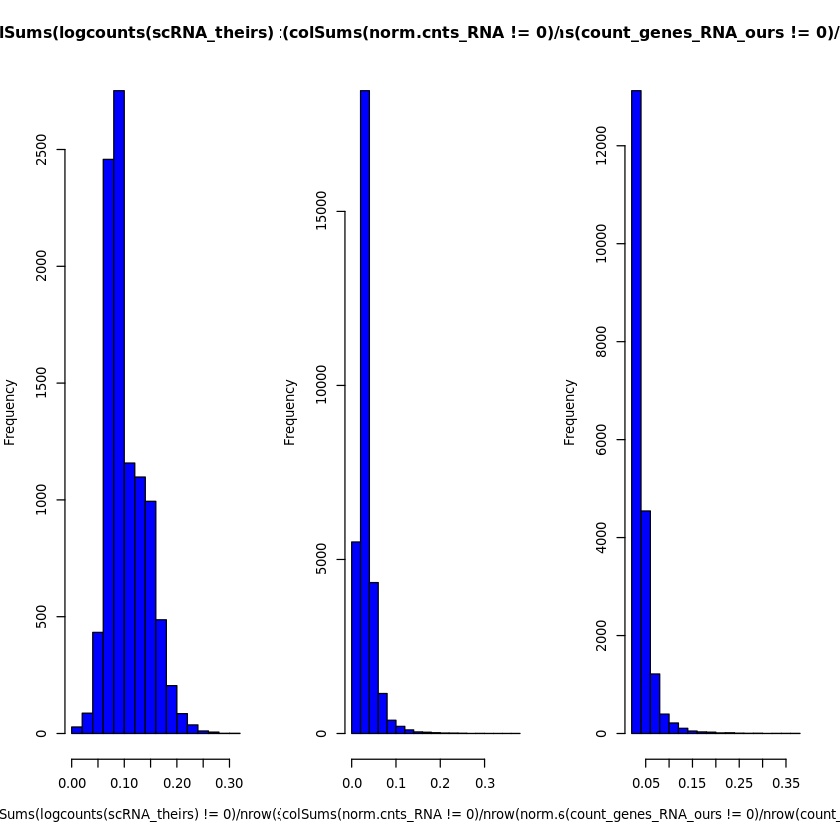

In [45]:
#jpeg(file="filtered/feature_saving_ATAC_plot3.jpeg")

par(mfrow=c(1,3))
hist(unlist(colSums(logcounts(scRNA_theirs) != 0)/nrow(scRNA_theirs)), breaks=20, col="blue")
hist(unlist(colSums(norm.cnts_RNA != 0)/nrow(norm.cnts_RNA)), breaks=20, col="blue")
hist(unlist(colSums(count_genes_RNA_ours != 0)/nrow(count_genes_RNA_ours)), breaks=20, col="blue")


dev.off()

In [50]:
list_feature_RNA_theirs <- colSums(logcounts(scRNA_theirs) != 0)/nrow(scRNA_theirs)
list_feature_RNA_ours_filtered <- colSums(count_genes_RNA_ours != 0)/nrow(count_genes_RNA_ours)
#norm.cnts_RNA <- log1p((scRNA_ours[common_genes, ]) %*% Diagonal(x=1e4/Matrix::colSums(scRNA_ours[common_genes, ])))
#norm.cnts
list_feature_RNA_ours <- colSums(norm.cnts_RNA != 0)/nrow(norm.cnts_RNA)


list_feature_ATAC_theirs <- colSums(logcounts(scATAC_theirs) != 0)/nrow(scATAC_theirs)
list_feature_ATAC_ours_filtered <- colSums(count_genes_ATAC_ours != 0)/nrow(count_genes_ATAC_ours)
#norm.cnts_ATAC <- log1p((scATAC_ours[common_genes, ]) %*% Diagonal(x=1e4/Matrix::colSums(scATAC_ours[common_genes, ])))
list_feature_ATAC_ours <- colSums(norm.cnts_ATAC != 0)/nrow(norm.cnts_ATAC)


In [52]:
jpeg(file="filtered/feature_saving_RNA_plot3.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_feature_RNA_theirs), breaks=20, col="blue")
hist(unlist(list_feature_RNA_ours), breaks=20, col="blue")
hist(unlist(list_feature_RNA_ours_filtered), breaks=20, col="blue")


dev.off()

#grid.arrange(plot1, plot2, ncol=2)
jpeg(file="filtered/feature_saving_ATAC_plot2.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_feature_ATAC_theirs), breaks=20, col="blue")
hist(unlist(list_feature_ATAC_ours), breaks=20, col="blue")
hist(unlist(list_feature_ATAC_ours_filtered), breaks=20, col="blue")

dev.off()


png 
  2

png 
  2

In [53]:
list_feature2_RNA_theirs <- rowSums(logcounts(scRNA_theirs) != 0)/ncol(scRNA_theirs)
list_feature2_RNA_ours_filtered <- rowSums(count_genes_RNA_ours != 0)/ncol(count_genes_RNA_ours)
#norm.cnts_RNA <- log1p((scRNA_ours[common_genes, ]) %*% Diagonal(x=1e4/Matrix::colSums(scRNA_ours[common_genes, ])))
#norm.cnts
list_feature2_RNA_ours <- rowSums(norm.cnts_RNA != 0)/ncol(norm.cnts_RNA)


list_feature2_ATAC_theirs <- rowSums(logcounts(scATAC_theirs) != 0)/ncol(scATAC_theirs)
list_feature2_ATAC_ours_filtered <- rowSums(count_genes_ATAC_ours != 0)/ncol(count_genes_ATAC_ours)
#norm.cnts_ATAC <- log1p((scATAC_ours[common_genes, ]) %*% Diagonal(x=1e4/Matrix::colSums(scATAC_ours[common_genes, ])))
list_feature2_ATAC_ours <- rowSums(norm.cnts_ATAC != 0)/ncol(norm.cnts_ATAC)


In [54]:
jpeg(file="filtered/feature2_saving_RNA_plot3.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_feature2_RNA_theirs), breaks=20, col="blue")
hist(unlist(list_feature2_RNA_ours), breaks=20, col="blue")
hist(unlist(list_feature2_RNA_ours_filtered), breaks=20, col="blue")


dev.off()

#grid.arrange(plot1, plot2, ncol=2)
jpeg(file="filtered/feature2_saving_ATAC_plot2.jpeg")

par(mfrow=c(1,3))
hist(unlist(list_feature2_ATAC_theirs), breaks=20, col="blue")
hist(unlist(list_feature2_ATAC_ours), breaks=20, col="blue")
hist(unlist(list_feature2_ATAC_ours_filtered), breaks=20, col="blue")

dev.off()


png 
  2

png 
  2